Importing necessary Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set(style='whitegrid')


Load The Dataset

In [88]:
df = pd.read_excel("WorldBank.xlsx", sheet_name="Development Indicators")
df.head()


,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

<h3><b>Objective 1:</b> Handle and Visualize Missing Data</h3>

Check for missing values

In [90]:
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values[missing_values > 0])

Missing Values per Column:
 Birth rate, crude (per 1,000 people)                            1009
Death rate, crude (per 1,000 people)                            1033
Electric power consumption (kWh per capita)                     6601
GDP (USD)                                                       2871
GDP per capita (USD)                                            2874
Individuals using the Internet (% of population)                7385
Infant mortality rate (per 1,000 live births)                   2465
Life expectancy at birth (years)                                1273
Population density (people per sq. km of land area)              604
Unemployment (% of total labor force) (modeled ILO estimate)    7241
dtype: int64


Drop columns with more than 50% missing values

In [91]:
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

Fill remaining missing values with mean (for numeric columns only)

In [92]:
numeric_cols = df.select_dtypes(include=np.number).columns
df.loc[:, numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


Fill missing values in categorical columns with mode

In [93]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])


Fill categorical columns (if any) with the most frequent value

In [94]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

In [95]:
print(df.isnull().sum())

Country Name                                           0
Country Code                                           0
Region                                                 0
IncomeGroup                                            0
Year                                                   0
Birth rate, crude (per 1,000 people)                   0
Death rate, crude (per 1,000 people)                   0
GDP (USD)                                              0
GDP per capita (USD)                                   0
Infant mortality rate (per 1,000 live births)          0
Life expectancy at birth (years)                       0
Population density (people per sq. km of land area)    0
dtype: int64


<h3><b>Objective 2:</b>Exploratory Data Analysis (EDA)</h3>

Basic Dataset Info

In [96]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 12449, Columns: 12


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 12 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country Name                                         12449 non-null  object 
 1   Country Code                                         12449 non-null  object 
 2   Region                                               12449 non-null  object 
 3   IncomeGroup                                          12449 non-null  object 
 4   Year                                                 12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                 12449 non-null  float64
 6   Death rate, crude (per 1,000 people)                 12449 non-null  float64
 7   GDP (USD)                                            12449 non-null  float64
 8   GDP per capita (USD)                                 12449 non-nul

Preview of the Dataset

In [98]:
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (USD),GDP per capita (USD),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area)
0,Afghanistan,AFG,South Asia,Low income,2018,28.643276,10.588539,1.936300e+10,520.897,47.9,64.044692,56.9378
1,Afghanistan,AFG,South Asia,Low income,2017,33.211000,6.575000,2.019180e+10,556.302,49.5,64.130000,55.5960
2,Afghanistan,AFG,South Asia,Low income,2016,33.981000,6.742000,1.936260e+10,547.228,51.2,63.763000,54.1971
3,Afghanistan,AFG,South Asia,Low income,2015,34.809000,6.929000,1.990710e+10,578.466,53.1,63.377000,52.7121
4,Afghanistan,AFG,South Asia,Low income,2014,35.706000,7.141000,2.048490e+10,613.856,55.1,62.966000,51.1148


Summary Statistics

In [99]:
df.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",GDP (USD),GDP per capita (USD),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area)
count,12449.00000,12449.000000,12449.000000,1.244900e+04,12449.000000,12449.000000,12449.000000,12449.000000
mean,1989.00000,28.643276,10.588539,1.700740e+11,8231.812259,51.704437,64.044692,318.861370
std,17.03007,12.588431,5.256681,7.876528e+11,14184.107284,41.311787,10.887673,1554.267868
min,1960.00000,6.900000,1.127000,8.824450e+06,34.790600,1.400000,18.907000,0.098625
25%,1974.00000,17.315000,7.024000,2.503530e+09,765.642000,18.200000,57.498000,21.290800
50%,1989.00000,28.643276,9.632000,2.035600e+10,4129.630000,51.704437,65.219000,69.609900
75%,2004.00000,39.870000,12.200000,1.700740e+11,8231.812259,65.200000,72.023000,183.913000
max,2018.00000,58.227000,54.444000,2.050000e+13,189171.000000,279.400000,85.417100,21389.100000


Missing Value Analysis


In [100]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
 
missing_df

,Missing Values,Percentage


Check Unique Values in Categorical Columns

In [101]:
print("Unique Regions:", df['Region'].nunique())
print("Unique Countries:", df['Country Name'].nunique())


Unique Regions: 7
Unique Countries: 211


Year Range of Data

In [102]:
print("Year range:", df['Year'].min(), "to", df['Year'].max())


Year range: 1960 to 2018


Outlier Detection (using IQR method)

In [103]:
Q1 = df['GDP (USD)'].quantile(0.25)
Q3 = df['GDP (USD)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['GDP (USD)'] < (Q1 - 1.5 * IQR)) | (df['GDP (USD)'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in GDP: {len(outliers)}")


Number of outliers in GDP: 636


 Region-wise Summary Stats

In [104]:
df.groupby('Region')[['GDP (USD)', 'Life expectancy at birth (years)']].mean().sort_values(by='GDP (USD)', ascending=False)

,GDP (USD),Life expectancy at birth (years)
Region,,
North America,2.629492e+12,73.438288
East Asia & Pacific,2.450725e+11,65.797108
Europe & Central Asia,2.160374e+11,71.036870
South Asia,1.151549e+11,57.196906
Middle East & North Africa,8.412868e+10,65.843176
Latin America & Caribbean,7.781963e+10,67.452522
Sub-Saharan Africa,3.516721e+10,51.502365


<h3><b>Objective 3:</b> Trends Over Time</h3>

GDP Trend - Top 5 countries

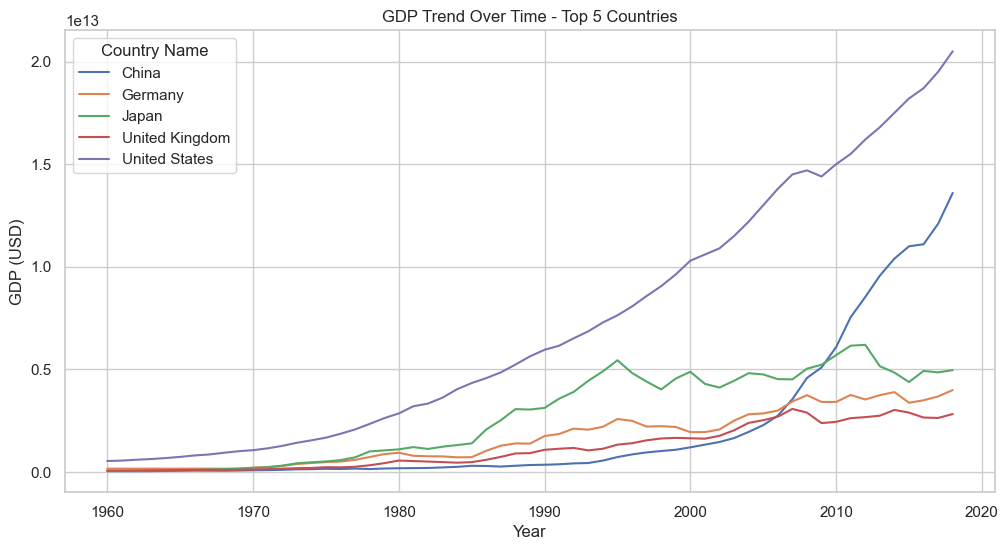

In [105]:
top_countries = df.groupby('Country Name')['GDP (USD)'].max().nlargest(5).index
trend_df = df[df['Country Name'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='Year', y='GDP (USD)', hue='Country Name')
plt.title("GDP Trend Over Time - Top 5 Countries")
plt.grid(True)
plt.show()

Life Expectancy Trend - Same Top 5

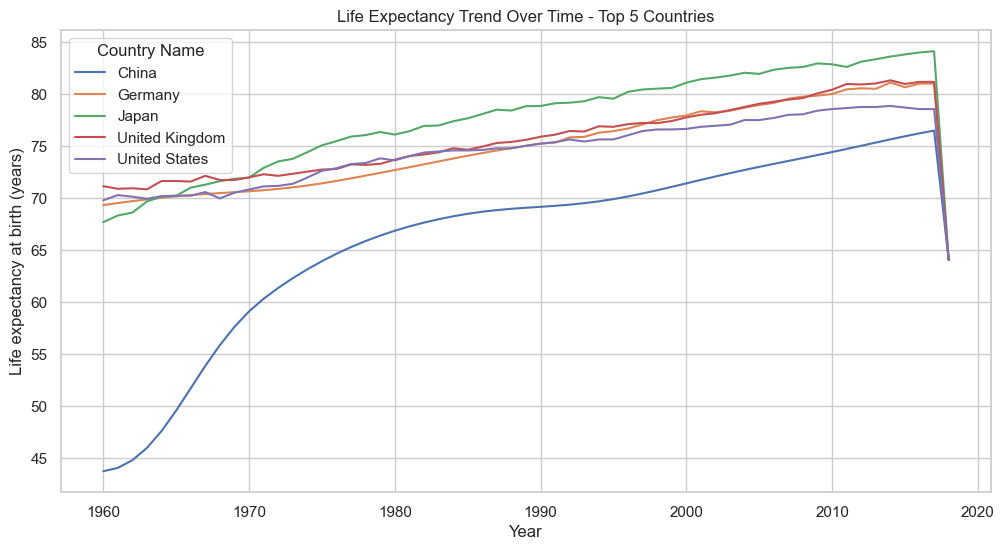

In [106]:
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='Year', y='Life expectancy at birth (years)', hue='Country Name')
plt.title("Life Expectancy Trend Over Time - Top 5 Countries")
plt.grid(True)
plt.show()

<h3><b>Objective 4:</b> Relationships Between Indicators</h3>

GDP vs Life Expectancy

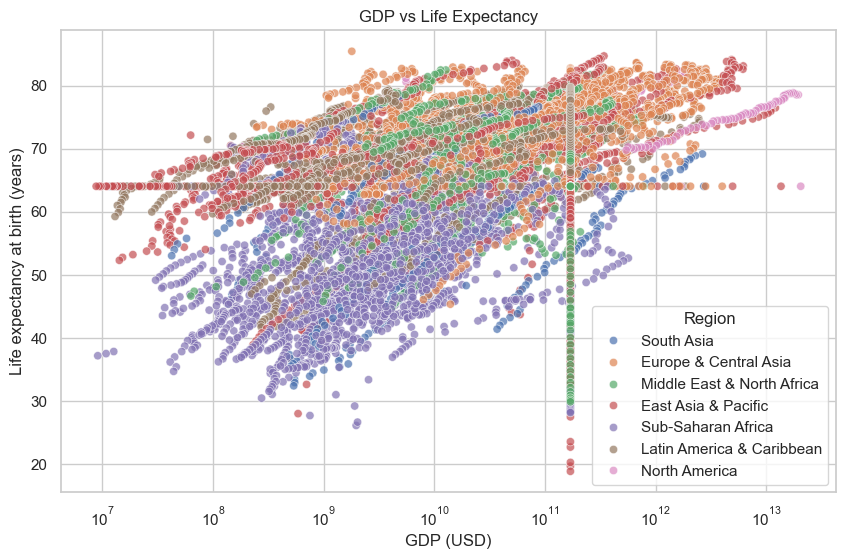

In [107]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GDP (USD)', y='Life expectancy at birth (years)', hue='Region', alpha=0.7)
plt.title("GDP vs Life Expectancy")
plt.xscale('log')
plt.grid(True)
plt.show()

Population Density vs Internet Usage

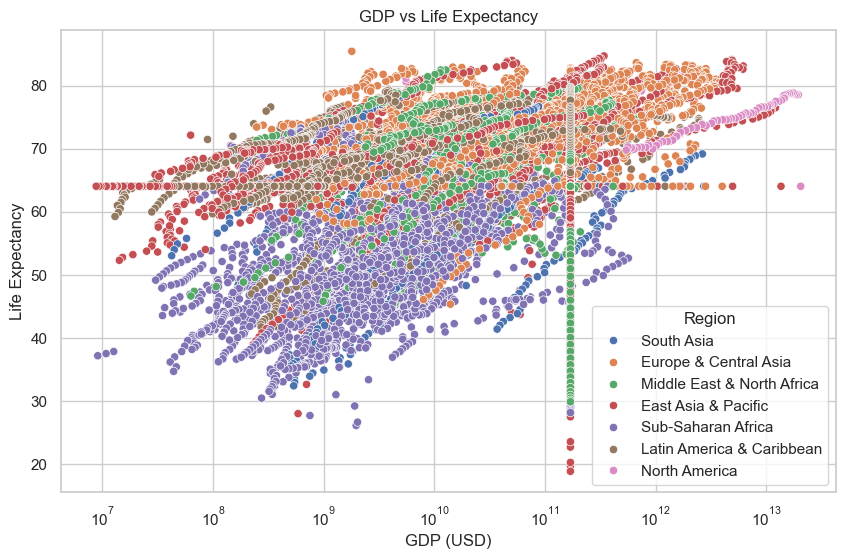

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP (USD)', y='Life expectancy at birth (years)', hue='Region')
plt.title("GDP vs Life Expectancy")
plt.xlabel("GDP (USD)")
plt.ylabel("Life Expectancy")
plt.xscale("log")
plt.grid(True)
plt.show()

<h3><b>Objective 5:</b> Present Insights with Visuals</h3>

Bar Chart – Top 10 Countries by GDP (Latest Year)

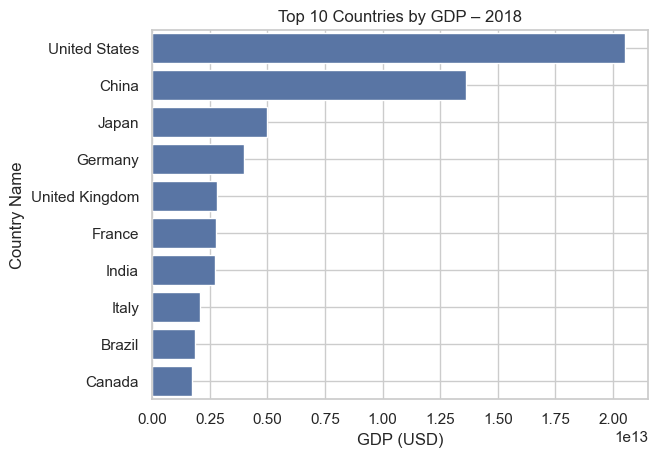

In [109]:
latest_year = df['Year'].max()
top10_gdp = df[df['Year'] == latest_year].nlargest(10, 'GDP (USD)')

sns.barplot(data=top10_gdp, x='GDP (USD)', y='Country Name')
plt.title(f"Top 10 Countries by GDP – {latest_year}")
plt.grid(True)
plt.show()

Final Correlation Heatmap

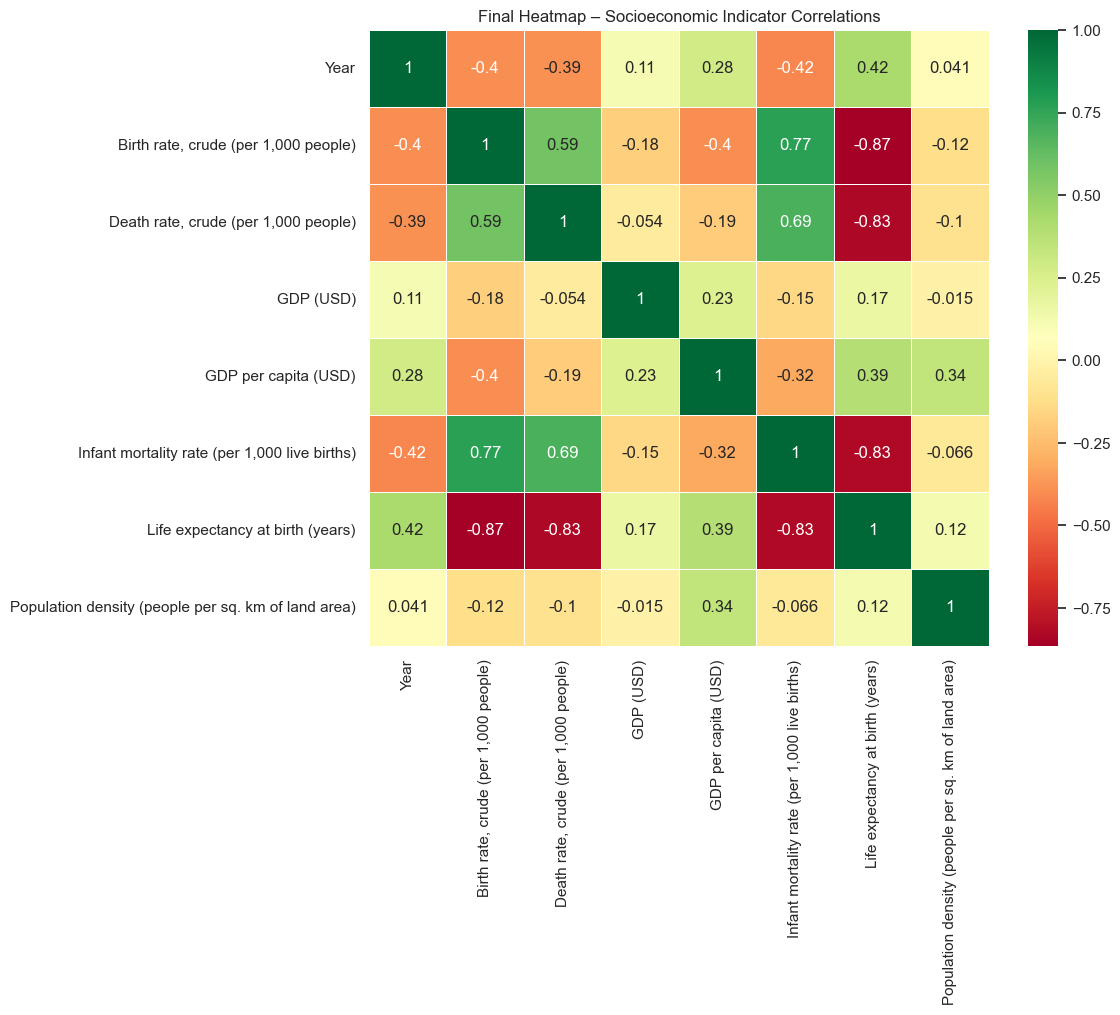

In [110]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title("Final Heatmap – Socioeconomic Indicator Correlations")
plt.show()